In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [153]:
file = pd.read_csv('/content/drive/MyDrive/train.csv')
file

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [154]:
file.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [155]:
file.drop_duplicates(inplace=True)
file.shape

(45205, 11)

In [156]:
file.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [157]:
for feature in ['age','day','dur','num_calls']:
        iqr = file[feature].quantile(0.75) - file[feature].quantile(0.25)
        upper_threshold = file[feature].quantile(0.75) + (1.5 * iqr)
        lower_threshold = file[feature].quantile(0.25) - (1.5 * iqr)
        file[feature] = file[feature].clip(lower_threshold, upper_threshold)

#EDA AND ENCODING

In [158]:
file['y'] = file['y'].map({'yes':1, 'no':0})

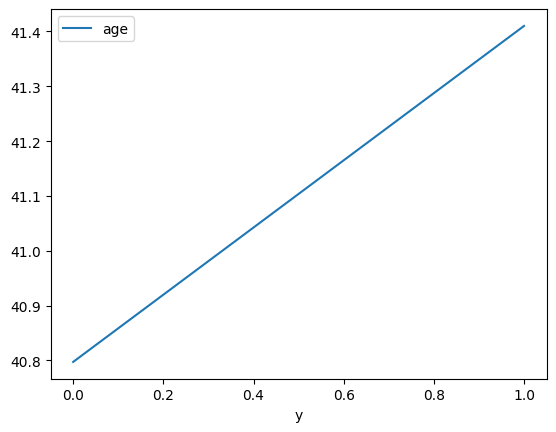

In [159]:
mean_prices = file.groupby('y')['age'].mean().sort_values().reset_index()
mean_prices.plot(x='y', y='age')
plt.show()

              job         y
1     blue-collar  0.072765
2    entrepreneur  0.082717
3       housemaid  0.087903
7        services  0.088851
9      technician  0.110585
11        unknown  0.118056
6   self-employed  0.118429
0          admin.  0.122050
4      management  0.137570
10     unemployed  0.155027
5         retired  0.227915
8         student  0.286780


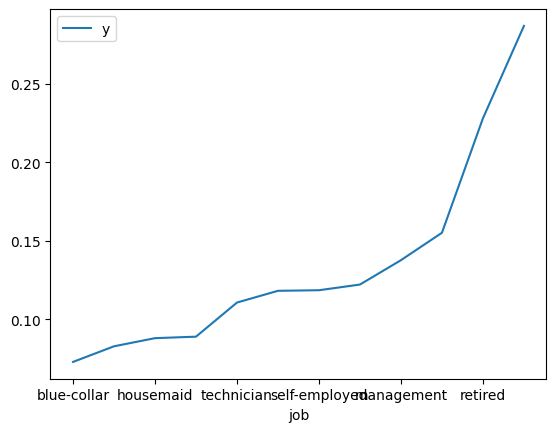

In [160]:
print((file.groupby('job')['y'].mean()).reset_index().sort_values('y'))
mean_prices = file.groupby('job')['y'].mean().sort_values().reset_index()
mean_prices.plot(x='job', y='y')
plt.show()

In [161]:
file['job'] = file['job'].map({ 'blue-collar' : 0,'entrepreneur':1,'housemaid': 2,'services': 3,'technician': 4,'unknown': 5,'self-employed': 6,'admin.': 7,'management':8,'unemployed': 9,'retired': 10,'student':11})

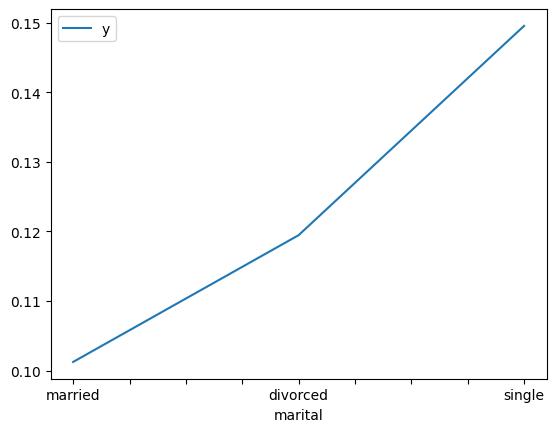

In [162]:
mean_prices = file.groupby('marital')['y'].mean().sort_values().reset_index()
mean_prices.plot(x='marital', y='y')
plt.show()

In [163]:
file['marital'] = file['marital'].map({'married':0,'divorced':1,'single':2})

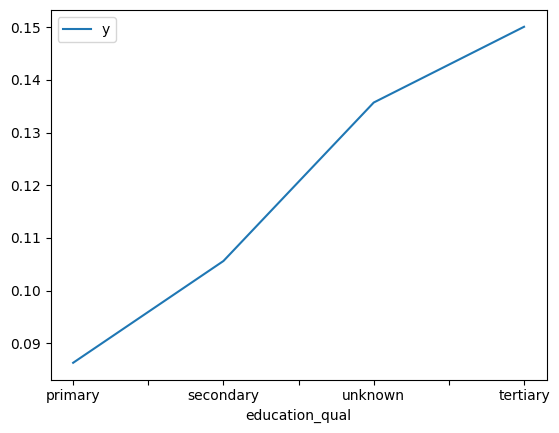

In [164]:
mean_prices = file.groupby('education_qual')['y'].mean().sort_values().reset_index()
mean_prices.plot(x='education_qual', y='y')
plt.show()

In [165]:
file['education_qual'] = file['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})

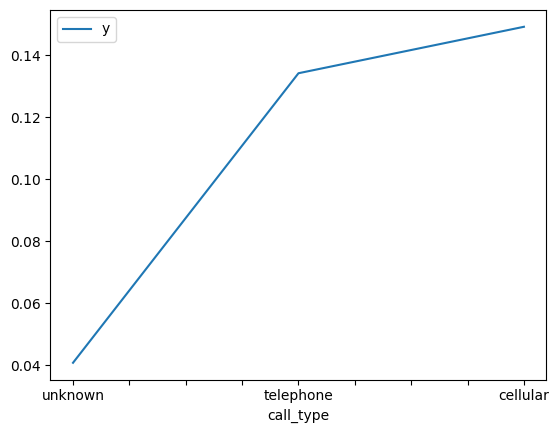

In [166]:
mean_prices = file.groupby('call_type')['y'].mean().sort_values().reset_index()
mean_prices.plot(x='call_type', y='y')
plt.show()

In [167]:
file['call_type'] = file['call_type'].map({'cellular':0,'telephone':1,'unknown':2})

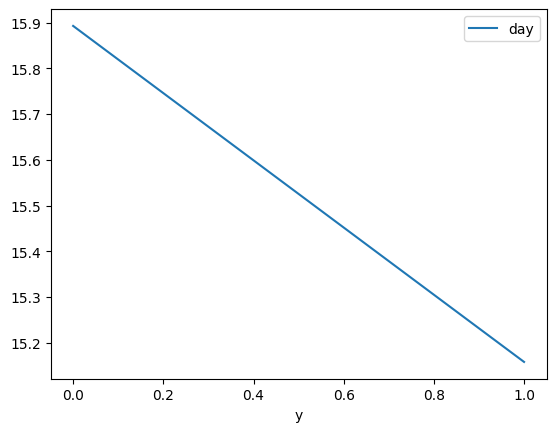

In [168]:
mean_prices = file.groupby('y')['day'].mean().sort_values().reset_index()
mean_prices.plot(x='y', y='day')
plt.show()

    mon         y
8   may  0.067199
5   jul  0.090949
4   jan  0.101212
9   nov  0.101511
6   jun  0.102266
1   aug  0.110168
3   feb  0.166478
0   apr  0.196794
10  oct  0.437669
11  sep  0.464594
2   dec  0.467290
7   mar  0.519916


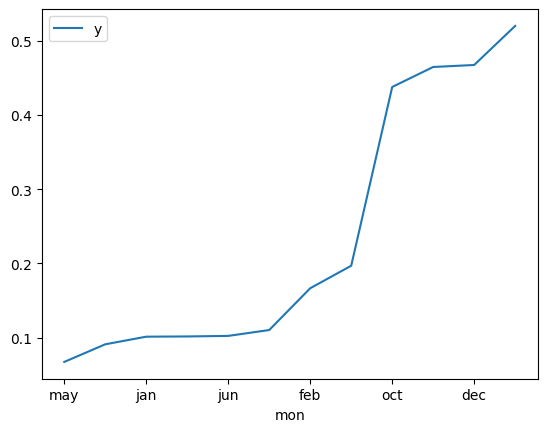

In [169]:
print((file.groupby('mon')['y'].mean()).reset_index().sort_values('y'))
mean_prices = file.groupby('mon')['y'].mean().sort_values().reset_index()
mean_prices.plot(x='mon', y='y')
plt.show()

In [170]:
file['mon'] = file['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

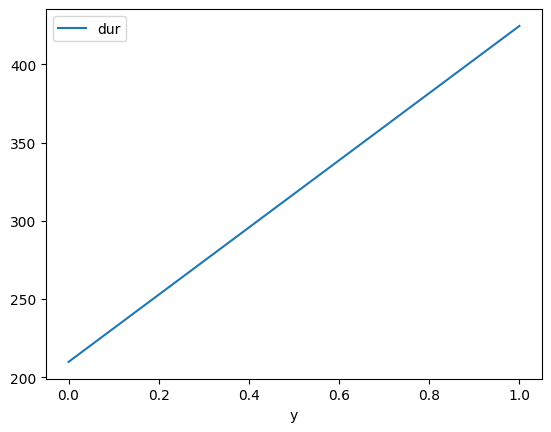

In [171]:
mean_prices = file.groupby('y')['dur'].mean().sort_values().reset_index()
mean_prices.plot(x='y', y='dur')
plt.show()

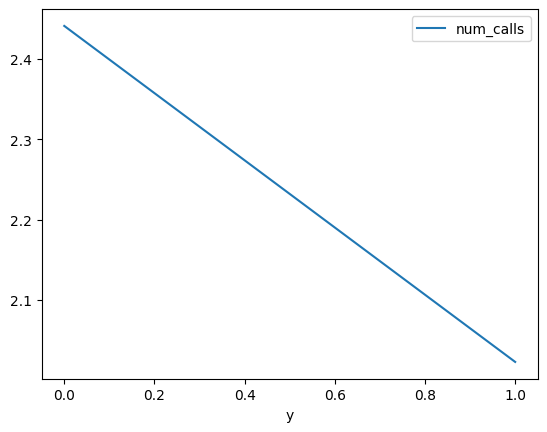

In [172]:
mean_prices = file.groupby('y')['num_calls'].mean().sort_values().reset_index()
mean_prices.plot(x='y', y='num_calls')
plt.show()

  prev_outcome         y
3      unknown  0.091630
0      failure  0.126097
1        other  0.166848
2      success  0.647253


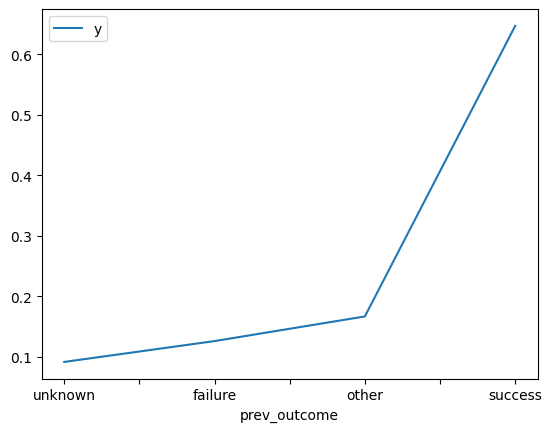

In [173]:
print((file.groupby('prev_outcome')['y'].mean()).reset_index().sort_values('y'))
mean_prices = file.groupby('prev_outcome')['y'].mean().sort_values().reset_index()
mean_prices.plot(x='prev_outcome', y='y')
plt.show()

In [174]:
file['prev_outcome'] = file['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

###SPLIT###

In [175]:
from sklearn.model_selection import train_test_split


X = file.loc[:, file.columns[:10]].values
y = file['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33903, 10), (11302, 10), (33903,), (11302,))

# Scaling - Not mandatory

# Model

In [176]:
# Logistic regression
# Decision Tree
# Random Forest
# XG Boost

In [177]:
file.y.value_counts() / file.shape[0]*100

y
0    88.299967
1    11.700033
Name: count, dtype: float64

#Without balancing - lets fit the model (F1 Score)

#LogisticRegression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8979826579366483, F1-Score: 0.4237881059470265


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#DecisionTreeClassifier

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10]:
  model = DecisionTreeClassifier(max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.8821048284812554, Cross-ValScore: 0.8821048341566998
Depth - 2, TrainScore: 0.8904816682889419, Cross-ValScore: 0.8904822934907515
Depth - 3, TrainScore: 0.8980916143114178, Cross-ValScore: 0.8968826644188287
Depth - 4, TrainScore: 0.9006872548152081, Cross-ValScore: 0.8982689211160203
Depth - 5, TrainScore: 0.9033713830634457, Cross-ValScore: 0.898652306252278
Depth - 6, TrainScore: 0.9062029908857623, Cross-ValScore: 0.8999797137834056
Depth - 7, TrainScore: 0.9091525823673421, Cross-ValScore: 0.8977084317414917
Depth - 8, TrainScore: 0.9126625962304221, Cross-ValScore: 0.8977380085581389
Depth - 9, TrainScore: 0.9186502669380291, Cross-ValScore: 0.8965287691085807
Depth - 10, TrainScore: 0.9236645724567147, Cross-ValScore: 0.8946410722813904


In [180]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.903202972925146, F1-Score: 0.4935185185185185


# RandomForestClassifier




In [217]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 3, max_features = "sqrt")
  model.fit(X_train, y_train)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")




N: 10, Cross-Val Score: 0.8838071156730386
N: 20, Cross-Val Score: 0.883779460805782
N: 50, Cross-Val Score: 0.883779460805782
N: 100, Cross-Val Score: 0.883779460805782
N: 200, Cross-Val Score: 0.883779460805782
N: 500, Cross-Val Score: 0.883779460805782
N: 1000, Cross-Val Score: 0.883779460805782


In [235]:
model = RandomForestClassifier(n_estimators = 10, max_depth = 3, max_features = "sqrt")
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8804335803561553, F1-Score: 0.03222918531781558


In [183]:
from xgboost import XGBClassifier

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
  model = XGBClassifier(learning_rate = lamb)
  model.fit(X_train, y_train)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")




model = XGBClassifier(learning_rate = 0.1)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Lambda: 0.001, Cross-Val Score: 0.8821048341566998
Lambda: 0.002, Cross-Val Score: 0.8821048341566998
Lambda: 0.005, Cross-Val Score: 0.8821048341566998
Lambda: 0.006, Cross-Val Score: 0.8821048341566998
Lambda: 0.007, Cross-Val Score: 0.8831077318148248
Lambda: 0.008, Cross-Val Score: 0.8891544075111195
Lambda: 0.009, Cross-Val Score: 0.8914551445827886
Lambda: 0.01, Cross-Val Score: 0.892664558013621
Lambda: 0.011, Cross-Val Score: 0.8929890417894322
Lambda: 0.012, Cross-Val Score: 0.893932933698346
Lambda: 0.013, Cross-Val Score: 0.8951128573031685
Lambda: 0.014, Cross-Val Score: 0.895997743462871
Lambda: 0.015, Cross-Val Score: 0.8970596468702071
Lambda: 0.016, Cross-Val Score: 0.8974725740268574
Lambda: 0.017, Cross-Val Score: 0.8980330460032586
Lambda: 0.018, Cross-Val Score: 0.8987409236143915
Lambda: 0.019, Cross-Val Score: 0.8987114076911903
Lambda: 0.02, Cross-Val Score: 0.8988294017914852
Lambda: 0.05, Cross-Val Score: 0.902427917383252
Lambda: 0.1, Cross-Val Score: 0.903784

###IMBLEARN - SMOTE + ENN (OverSampling + Undersampling)###

In [184]:
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [185]:
y_train_smoteenn.value_counts() / y_train_smoteenn.shape[0]*100

y
1    56.234186
0    43.765814
Name: count, dtype: float64

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train_smoteenn, y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.7657936648380818, F1-Score: 0.4675115670891169


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10]:
  model = DecisionTreeClassifier(max_depth = depth)
  model.fit(X_train_smoteenn, y_train_smoteenn)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.6336902339026045, Cross-ValScore: 0.8821048341566998
Depth - 2, TrainScore: 0.6774031796596172, Cross-ValScore: 0.8904822934907515
Depth - 3, TrainScore: 0.6708255906556941, Cross-ValScore: 0.8968826644188287
Depth - 4, TrainScore: 0.7786921511370675, Cross-ValScore: 0.8982689211160203
Depth - 5, TrainScore: 0.7680441258885644, Cross-ValScore: 0.898652306252278
Depth - 6, TrainScore: 0.7986018936377312, Cross-ValScore: 0.9000681832614357
Depth - 7, TrainScore: 0.7964781877709937, Cross-ValScore: 0.897708423042428
Depth - 8, TrainScore: 0.8397486948057694, Cross-ValScore: 0.8976200666522264
Depth - 9, TrainScore: 0.8465622511282187, Cross-ValScore: 0.8962927374126723
Depth - 10, TrainScore: 0.8599239005397752, Cross-ValScore: 0.8942281625228677


In [188]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_train_smoteenn, y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8019819500973279, F1-Score: 0.4954914337240757


#RandomForestClassifier

In [189]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 3, max_features = "sqrt")
  model.fit(X_train_smoteenn, y_train_smoteenn)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.8874733569425924
N: 20, Cross-Val Score: 0.8906290727928953
N: 50, Cross-Val Score: 0.8893018740392972
N: 100, Cross-Val Score: 0.889095384363781
N: 200, Cross-Val Score: 0.8885939703309733
N: 500, Cross-Val Score: 0.8888299498324995
N: 1000, Cross-Val Score: 0.888977416360677


In [190]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = "sqrt")
model.fit(X_train_smoteenn, y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.723765705184923, F1-Score: 0.4317437204222789


## XGBoost

In [191]:
from xgboost import XGBClassifier

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
  model = XGBClassifier(learning_rate = lamb)
  model.fit(X_train_smoteenn, y_train_smoteenn)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.8821048341566998
Lambda: 0.002, Cross-Val Score: 0.8821048341566998
Lambda: 0.005, Cross-Val Score: 0.8821048341566998
Lambda: 0.006, Cross-Val Score: 0.8821048341566998
Lambda: 0.007, Cross-Val Score: 0.8831077318148248
Lambda: 0.008, Cross-Val Score: 0.8891544075111195
Lambda: 0.009, Cross-Val Score: 0.8914551445827886
Lambda: 0.01, Cross-Val Score: 0.892664558013621
Lambda: 0.011, Cross-Val Score: 0.8929890417894322
Lambda: 0.012, Cross-Val Score: 0.893932933698346
Lambda: 0.013, Cross-Val Score: 0.8951128573031685
Lambda: 0.014, Cross-Val Score: 0.895997743462871
Lambda: 0.015, Cross-Val Score: 0.8970596468702071
Lambda: 0.016, Cross-Val Score: 0.8974725740268574
Lambda: 0.017, Cross-Val Score: 0.8980330460032586
Lambda: 0.018, Cross-Val Score: 0.8987409236143915
Lambda: 0.019, Cross-Val Score: 0.8987114076911903
Lambda: 0.02, Cross-Val Score: 0.8988294017914852
Lambda: 0.05, Cross-Val Score: 0.902427917383252
Lambda: 0.1, Cross-Val Score: 0.903784

In [192]:
model = XGBClassifier(learning_rate = 0.1)
model.fit(X_train_smoteenn, y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8770129180675986, F1-Score: 0.5959302325581395


In [193]:
feature_importances = pd.DataFrame(zip(file.columns[1:10], model.feature_importances_), columns = ['feature', 'score'])
feature_importances.sort_values(by = 'score', ascending = False)

,feature,score
7,num_calls,0.234141
4,day,0.183725
6,dur,0.111229
3,call_type,0.075725
2,education_qual,0.072440
8,prev_outcome,0.058896
1,marital,0.037457
5,mon,0.026024
0,job,0.019761


In [194]:
important_features = ['num_calls', 'dur', 'job']

In [195]:
important_features = ['num_calls', 'dur', 'job']
target_column = 'y'

X = file[important_features]
y = file[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smoteenn = SMOTEENN()
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

for lamb in [0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8 ,1]:
    model = XGBClassifier(learning_rate=lamb)
    cross_score = np.mean(cross_val_score(model, X_train_smoteenn[important_features], y_train_smoteenn, cv=10))
    print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")




Lambda: 0.017, Cross-Val Score: 0.9011023951051756
Lambda: 0.018, Cross-Val Score: 0.9018270236672663
Lambda: 0.019, Cross-Val Score: 0.9021290745823102
Lambda: 0.02, Cross-Val Score: 0.9026123031557814
Lambda: 0.05, Cross-Val Score: 0.9101012380777295
Lambda: 0.1, Cross-Val Score: 0.9198552128974272
Lambda: 0.2, Cross-Val Score: 0.9403290907777764
Lambda: 0.3, Cross-Val Score: 0.9515326145318562
Lambda: 0.4, Cross-Val Score: 0.9567570658192498
Lambda: 0.5, Cross-Val Score: 0.9603505078227019
Lambda: 0.6, Cross-Val Score: 0.9621924867627596
Lambda: 0.7, Cross-Val Score: 0.9645480060608979
Lambda: 0.8, Cross-Val Score: 0.965363478786128
Lambda: 1, Cross-Val Score: 0.9677792021763205


In [196]:
best_learning_rate = 1
model = XGBClassifier(learning_rate=best_learning_rate)
model.fit(X_train_smoteenn[important_features], y_train_smoteenn)

test_accuracy = model.score(X_test[important_features], y_test)
f1 = f1_score(y_test, model.predict(X_test[important_features]))
print(f"Test data accuracy: {test_accuracy}, F1-Score: {f1}")


Test data accuracy: 0.7996902997456034, F1-Score: 0.3280148423005566
